# Classification with ANN

## Breast cancer wisconsin (diagnostic) dataset

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Data Set Characteristics:

Measuremnts of tumors and classification if they're malignent or benign

Number of Instances: 569

Number of Attributes: 30 numeric, predictive attributes and the class

Attribute Information:
 - radius (mean of distances from center to points on the perimeter)
 - texture (standard deviation of gray-scale values)
 - perimeter
 - area
- smoothness (local variation in radius lengths)
 - compactness (perimeter^2 / area - 1.0)
 - concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

class:
 - WDBC-Malignant
- WDBC-Benign

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
pwd = os.getcwd()
df = pd.read_csv(pwd + '/cancer_classification.csv')

## EDA

In [5]:
df.info()
#no missing vales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


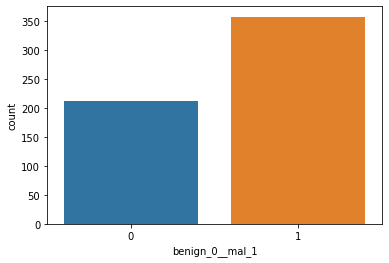

In [8]:
#countplot of label for classification task
sns.countplot(x='benign_0__mal_1',data=df)
#more or less balanced

In [10]:
#check correlation between features
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

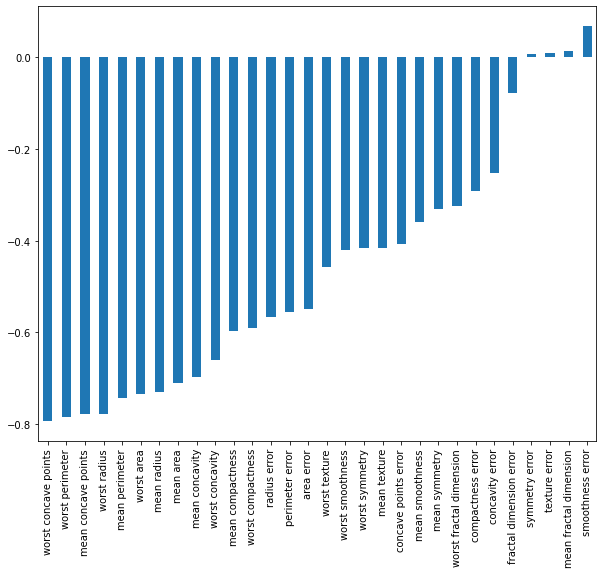

In [14]:
plt.figure(figsize=(10,8))
#drop label column
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
#we see strong correlation

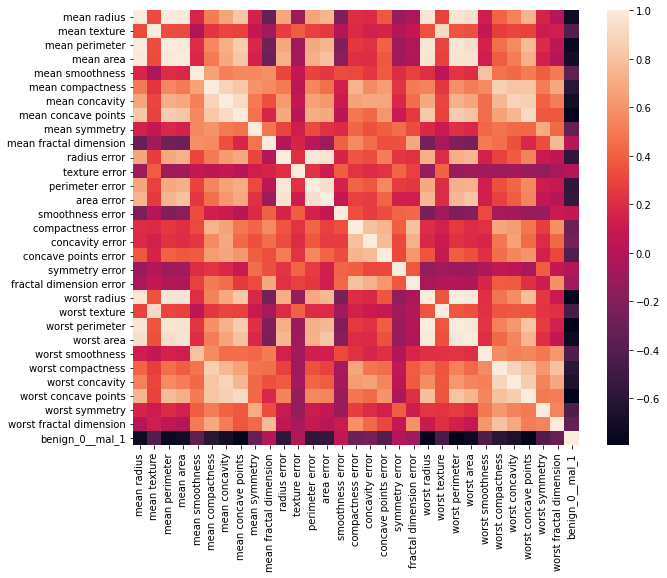

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

## Data Preprocessing

In [19]:
#as numpy array
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#for binary classification last activation function is sigmoid
#output between 0 and 1 , malignent or benign
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
#train model
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6783 - val_loss: 0.6598
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6433 - val_loss: 0.6246
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6037 - val_loss: 0.5816
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5571 - val_loss: 0.5298
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5023 - val_loss: 0.4699
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4493 - val_loss: 0.4119
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3929 - val_loss: 0.3577
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3474 - val_loss: 0.3140
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3084 - val_loss: 0.2768
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2777 - val_loss: 0.2473
Epoch 11

In [26]:
#plot out training and validation loss
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.678343,0.659765
1,0.643260,0.624583
2,0.603660,0.581624
3,0.557065,0.529789
4,0.502335,0.469864
...,...,...
595,0.008937,0.286257
596,0.009044,0.321416
597,0.007609,0.278885
598,0.007679,0.302031


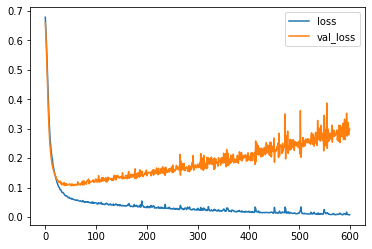

In [27]:
losses.plot()
#overfitting to training data, val_loss goes up
#use early stopping

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
#if metric is loss, needs to be minimized, accuracy needs to be maximized

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
#train model
#add early stopping
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6673 - val_loss: 0.6360
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6115 - val_loss: 0.5790
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5560 - val_loss: 0.5274
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5061 - val_loss: 0.4755
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4530 - val_loss: 0.4185
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4005 - val_loss: 0.3648
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3547 - val_loss: 0.3205
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3151 - val_loss: 0.2858
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2825 - val_loss: 0.2520
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2583 - val_loss: 0.2308
Epoch 11

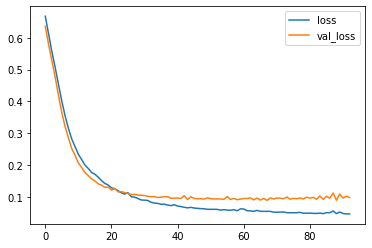

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [33]:
#add dropout layers after each dense layer to prevent overfitting

from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
#train model with dropout layers and early stopping
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6966 - val_loss: 0.6830
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6798 - val_loss: 0.6708
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6740 - val_loss: 0.6593
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6597 - val_loss: 0.6500
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6390 - val_loss: 0.6402
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6403 - val_loss: 0.6270
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6279 - val_loss: 0.6099
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6093 - val_loss: 0.5887
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5995 - val_loss: 0.5636
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5799 - val_loss: 0.5426
Epoch 11

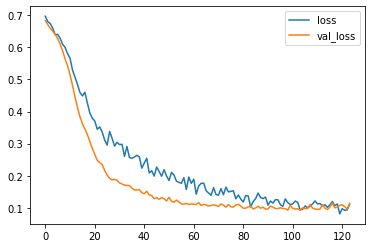

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
#looks good!

## Evaluation

In [40]:
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [43]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 5 83]]
